<a href="https://colab.research.google.com/github/marcosguimaraes/hello_world/blob/master/Ar_Condicionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Read the excel file "/content/sample_data/DOE Data Cold Hot Water.xlsx" and describe the data, the descriptive statistic, Frequency chart, box plot and parallel coordinates?

## Load data

### Subtask:
Load the data from "/content/sample_data/DOE Data Cold Hot Water.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame as requested.



In [6]:
import pandas as pd

df = pd.read_excel("/content/sample_data/DOE Data Cold Hot Water.xlsx")

**Reasoning**:
Display the first few rows of the DataFrame to verify the data has been loaded correctly.



In [7]:
df.head()

,Experiment,Amb Water T,Split Hot,Hot Water T,Hot Water Vol Flow,Power,Inlet Cold Water Vol Flow
0,1,24.471761,0.470502,36.471761,6.604141,5.441164,3.920315
1,2,23.277969,0.596401,35.277969,7.653071,6.304293,2.874459
2,3,26.306339,0.528879,38.306339,4.992916,4.114865,5.526377
3,4,26.717366,0.577653,38.717366,4.632069,3.817739,5.885997
4,5,25.025209,0.495960,37.025209,6.117972,5.041033,4.404982


## Describe data

### Subtask:
Provide a general description of the data, including the columns and their types.


**Reasoning**:
Print the information and shape of the DataFrame to understand its structure and data types.



In [8]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Experiment                 200 non-null    int64  
 1   Amb Water T                200 non-null    float64
 2   Split Hot                  200 non-null    float64
 3   Hot Water T                200 non-null    float64
 4   Hot Water Vol Flow         200 non-null    float64
 5   Power                      200 non-null    float64
 6   Inlet Cold Water Vol Flow  200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB
(200, 7)


## Descriptive statistics

### Subtask:
Calculate and display descriptive statistics for the numerical columns in the DataFrame.


**Reasoning**:
Calculate and display descriptive statistics for the numerical columns in the DataFrame.



In [9]:
display(df.describe())

,Experiment,Amb Water T,Split Hot,Hot Water T,Hot Water Vol Flow,Power,Inlet Cold Water Vol Flow
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,24.426439,0.515420,36.426439,6.644138,5.473963,3.880327
std,57.879185,1.189292,0.044492,1.189292,1.044789,0.859844,1.041622
min,1.000000,21.000000,0.400000,33.000001,3.506387,2.890607,0.877292
25%,50.750000,23.624594,0.485498,35.624594,5.948720,4.901721,3.178187
50%,100.500000,24.429731,0.515277,36.429731,6.641064,5.471551,3.883503
75%,150.250000,25.217906,0.544923,37.217906,7.348474,6.053673,4.573700
max,200.000000,28.000000,0.650000,40.000000,9.655473,7.951453,7.007679


## Frequency charts and box plots

### Subtask:
Generate frequency charts (histograms) and box plots for each relevant column to visualize their distributions and identify potential outliers.


**Reasoning**:
Import the necessary libraries for plotting and identify the numerical columns for visualization.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Experiment')

**Reasoning**:
Iterate through the selected numerical columns and generate a histogram and a box plot for each column in separate subplots.



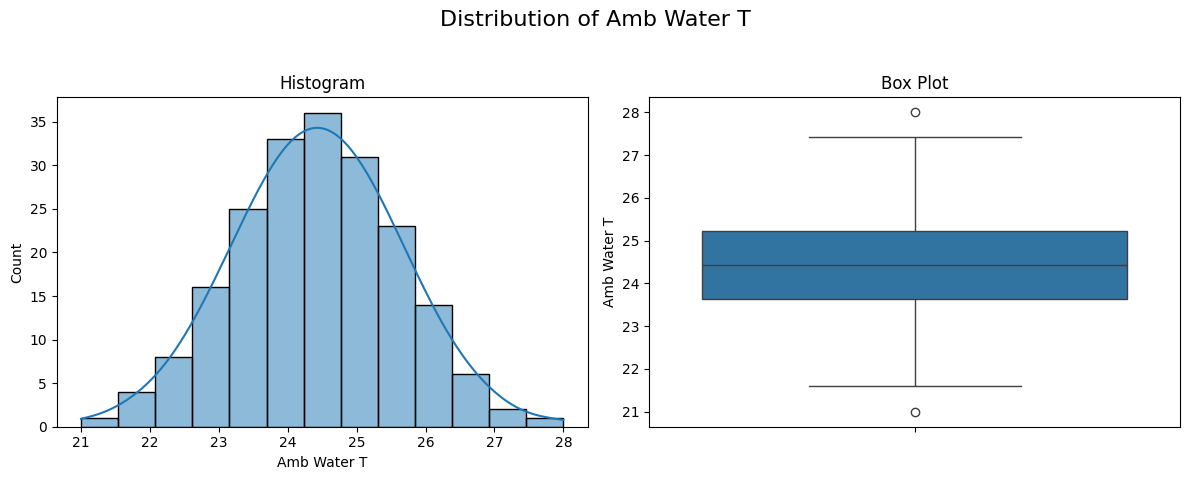

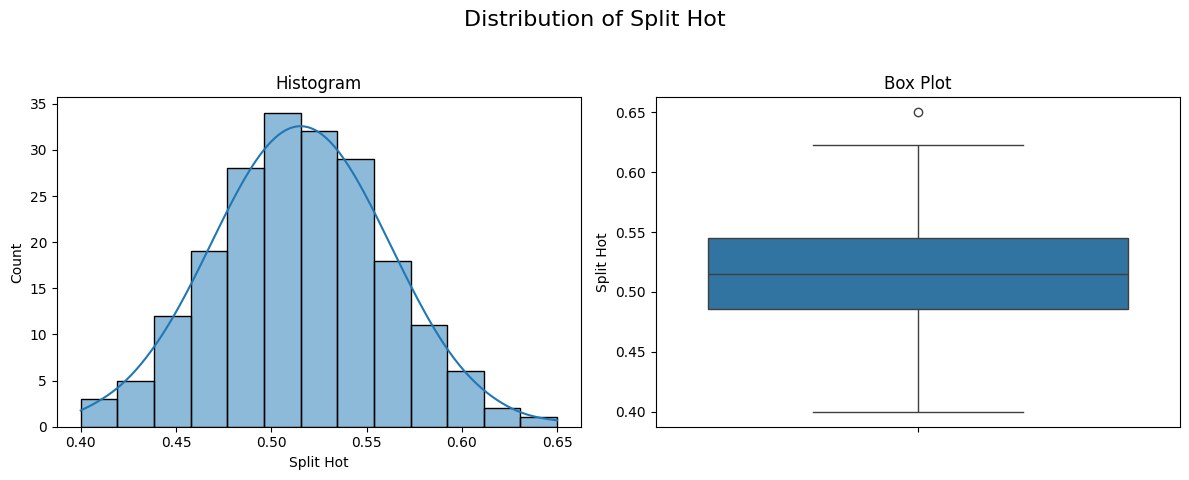

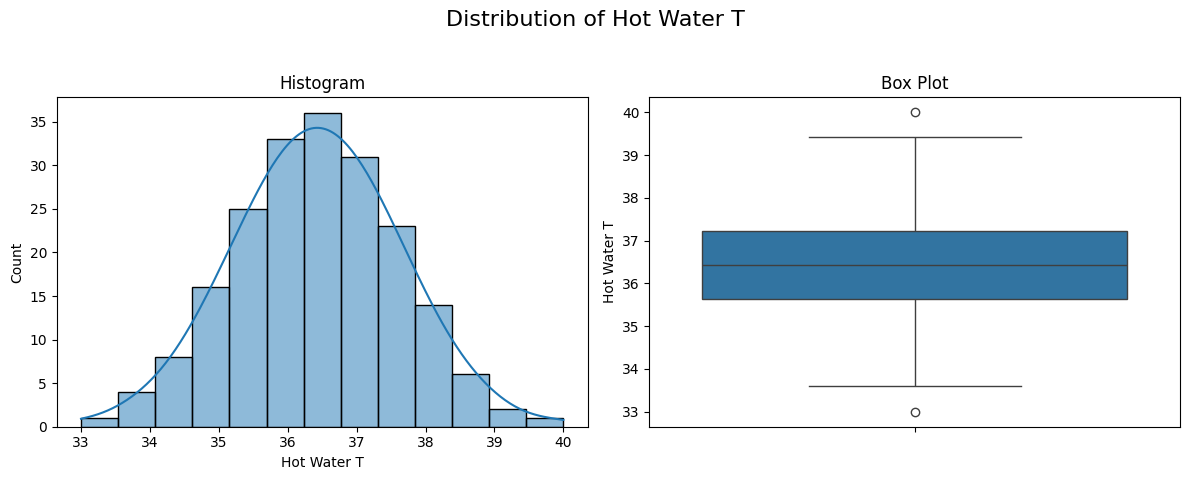

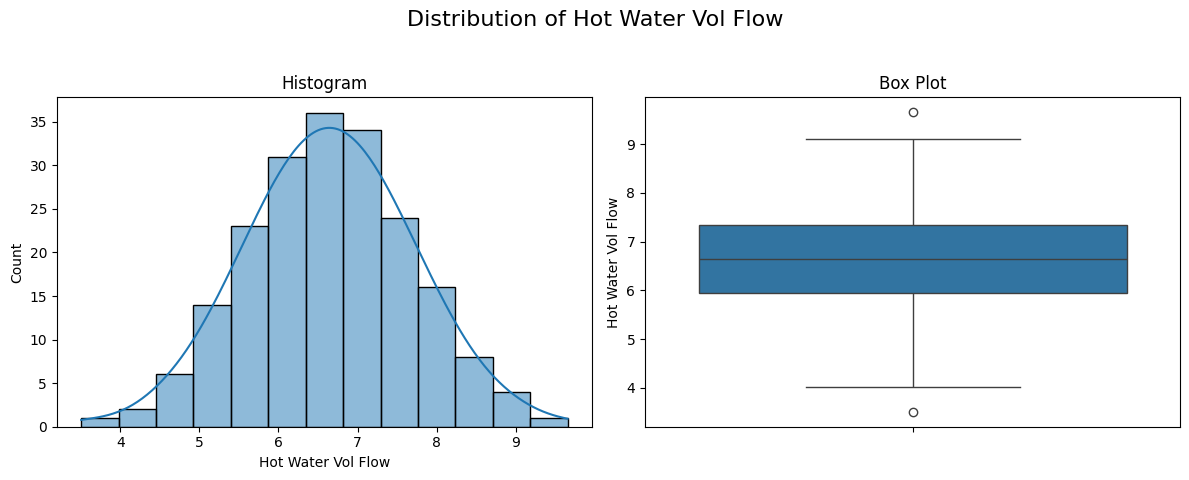

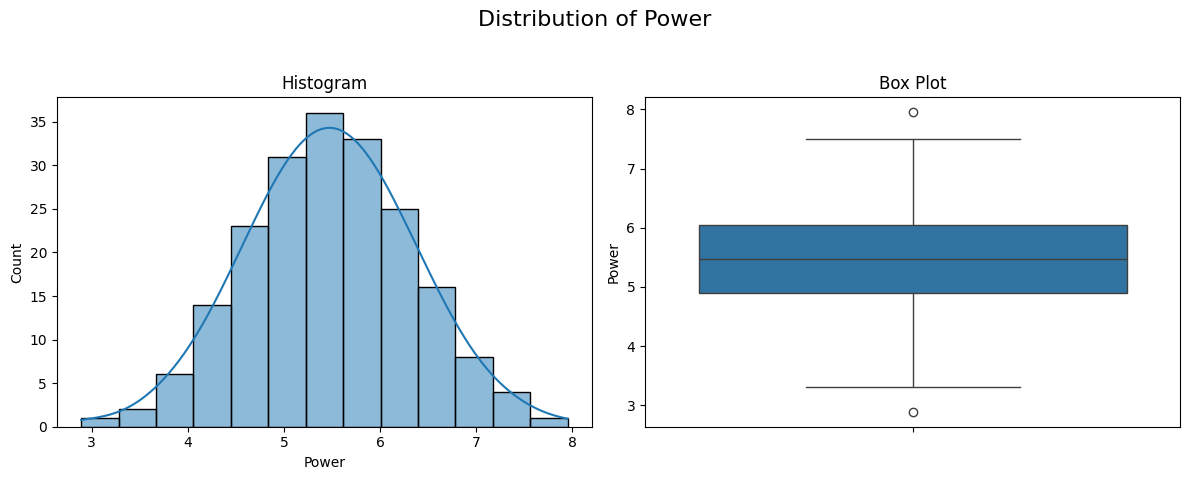

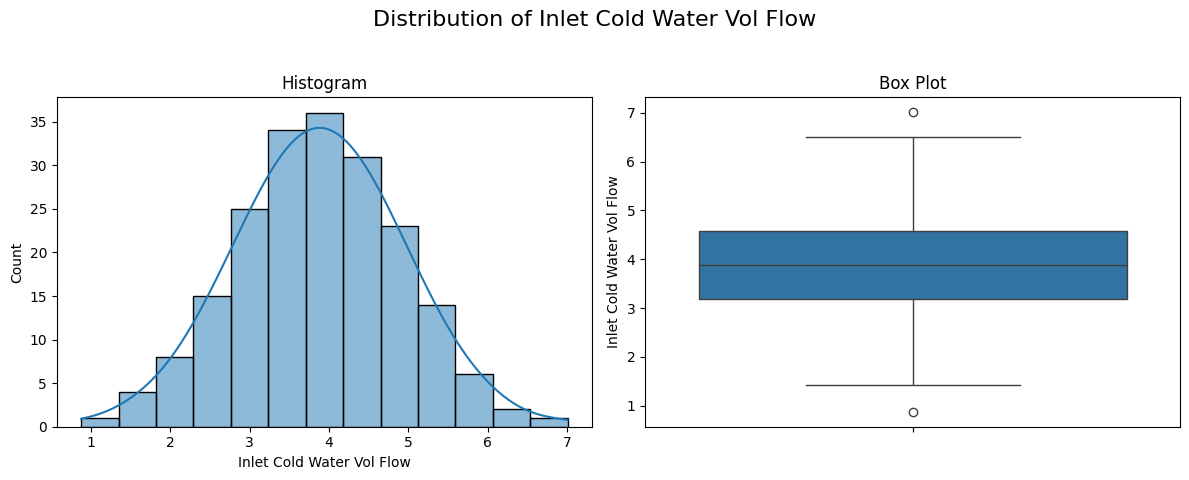

In [11]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Distribution of {col}', fontsize=16)

    sns.histplot(ax=axes[0], data=df, x=col, kde=True)
    axes[0].set_title('Histogram')

    sns.boxplot(ax=axes[1], data=df, y=col)
    axes[1].set_title('Box Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Parallel coordinates plot

### Subtask:
Create a parallel coordinates plot for the specified columns ('Amb Water T', 'Split Hot', 'Hot Water T', 'Inlet Cold Water Vol Flow', and 'Power') to visualize the relationships and patterns between these variables.


**Reasoning**:
Import the necessary function for parallel coordinates plotting and create the plot using the specified columns.



## Summary:

### Data Analysis Key Findings

*   The dataset contains 200 entries and 7 columns with no missing values.
*   The columns include `Experiment` (int64) and several float64 columns representing temperatures and flow rates: `Amb Water T`, `Split Hot`, `Hot Water T`, `Hot Water Vol Flow`, `Power`, and `Inlet Cold Water Vol Flow`.
*   Descriptive statistics were calculated for all numerical columns, providing insights into their central tendency, dispersion, and range.
*   Frequency charts (histograms) and box plots were generated for each numerical column (excluding 'Experiment'), visualizing their distributions and potential outliers.
*   A parallel coordinates plot was created for selected variables (`Amb Water T`, `Split Hot`, `Hot Water T`, `Inlet Cold Water Vol Flow`, and `Power`) to illustrate the relationships and patterns between them.

### Insights or Next Steps

*   Investigate the potential outliers identified in the box plots to understand their impact on the data and analysis.
*   Further analyze the relationships observed in the parallel coordinates plot, potentially exploring correlations or clustering within the data.


In [25]:
import plotly.express as px

# Select the columns for the parallel coordinates plot in the desired order, including 'Hot Water Vol Flow'
columns_for_parallel_plot_plotly = ['Amb Water T', 'Split Hot', 'Hot Water T', 'Inlet Cold Water Vol Flow', 'Hot Water Vol Flow', 'Power']

# Create the parallel coordinates plot using plotly express
fig = px.parallel_coordinates(df, dimensions=columns_for_parallel_plot_plotly, color='Power',
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title='Parallel Coordinates Plot (Plotly - Power as Color)')

# Update layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=15)
)

fig.show()

print("\n--- Parallel Coordinates Plot Analysis (Plotly) ---")
print("This interactive parallel coordinates plot uses Plotly.")
print("Each line represents a data point, and the color of the line is determined by the 'Power' value.")
print("You can hover over the lines to see the exact values for each variable.")
print("The order of the axes is set to display 'Power' as the rightmost variable.")
print("This plot helps visualize the relationships and patterns between the selected variables and how they relate to different power levels.")


--- Parallel Coordinates Plot Analysis (Plotly) ---
This interactive parallel coordinates plot uses Plotly.
Each line represents a data point, and the color of the line is determined by the 'Power' value.
You can hover over the lines to see the exact values for each variable.
The order of the axes is set to display 'Power' as the rightmost variable.
This plot helps visualize the relationships and patterns between the selected variables and how they relate to different power levels.
